In [1]:
from keras.layers import SimpleRNN
# It takes input of shapes (batch_size, timestamp, input_features)
# It has two output modes it can return either the full sequence of successive outputs as 3D tensor
# (batch_size, timestamp, output_features)
# Or last output can be of the shape 2D tensor
# (batch_size, features)
# These two modes are controlled by the return sequences argument

from keras.models import Sequential
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 1000
maxlen = 500
batch_size = 32
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print("Train sequences",len(x_train))
print("Test sequences",len(x_test))



Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step
Train sequences 25000
Test sequences 25000


In [2]:
print(x_train.shape)
print(x_test.shape)
# print(x_train)

input_train = sequence.pad_sequences(x_train, maxlen = maxlen)
input_test = sequence.pad_sequences(x_test, maxlen = maxlen)

print("Input shape", input_train.shape)
print("Input labels",y_train.shape)
print("Input test", input_test.shape)
print("Test labels",y_test.shape)
# print(input_train)

(25000,)
(25000,)
Input shape (25000, 500)
Input labels (25000,)
Input test (25000, 500)
Test labels (25000,)


In [5]:

model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.CuDNNLSTM(32))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, batch_size=32, epochs = 10, verbose = 1, validation_split=0.2)



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.4950 - acc: 0.7531 - val_loss: 0.4285 - val_acc: 0.8112
Epoch 2/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.3694 - acc: 0.8425 - val_loss: 0.3689 - val_acc: 0.8488
Epoch 3/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.3946 - acc: 0.8313 - val_loss: 0.3759 - val_acc: 0.8442
Epoch 4/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.3435 - acc: 0.8563 - val_loss: 0.3826 - val_acc: 0.8392
Epoch 5/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.3219 - acc: 0.8657 - val_loss: 0.3468 - val_acc: 0.8578
Epoch 6/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.3087 - acc: 0.8726 - val_loss: 0.3551 - val_acc: 0.8510
Epoch 7/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.3372 - acc: 0.8517 - val_loss: 0.4422 - val_acc:

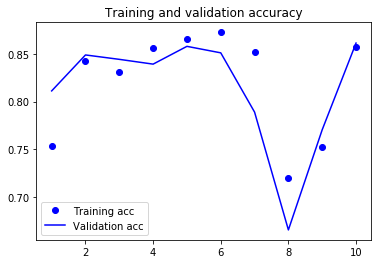

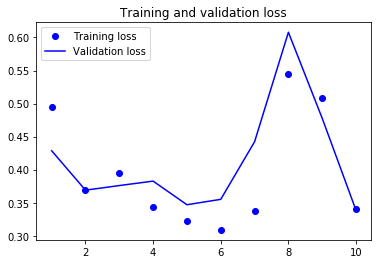

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()